In [245]:
# !pip install folium
# !pip install eralchemy

Processing /Users/maheshrao/Library/Caches/pip/wheels/65/54/69/1aee9e66ab19916293208d4c9de0d3898adebe6b2eeff6476b/pygraphviz-1.5-cp37-cp37m-macosx_10_7_x86_64.whl


In [257]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import geopandas as gpd # not for students, install from anaconda gui
import numpy as np
# import re
# from shapely.geometry import Point
import sqlite3 as sql
import sqlalchemy as db
# from sqlalchemy import create_engine
import folium

from eralchemy import render_er

%matplotlib inline

In [2]:
# Use read_csv to import building permits csv that was downloaded from data.nashville.gov into a dataframe

permits = pd.read_csv('data/Building_Permits_Issued.csv', low_memory=False)

In [3]:
# How many rows/columns in the dataframe

permits.shape

(34474, 20)

In [4]:
# Show the first 5 rows

permits.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
0,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,11/01/2019,11/01/2019,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,37216,S SIDE MAPLEWOOD LANE & W OF HUTSON AVE,CONTRERAS DESIGN BUILD LLC,CADM,CAZ01A001,3728422,to demolish existing residence and detached st...,8.0,37011002.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228..."
1,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,02/25/2019,07/22/2019,0.0,812 BRIAR CIR,MADISON,TN,37115,COMMON AREA HOMES AT BRIAR,COLE INVESTMENTS LLC,CAUO,CAA03R301,3611315,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,37010802.0,"812 BRIAR CIR\nMADISON, TN 37115"
2,2019011479,Building Commercial - Rehab,Restaurant (Full Service),11714005500,02/27/2019,07/22/2019,759670.0,2171 GREEN HILLS VILLAGE DR,NASHVILLE,TN,37215,W/S HILLSBORO PK. & N/S ABBOTT MARTIN RD.,"BATTINO CONTRACTING SOLUTIONS, LLC",CACR,CAF19A203,3613106,2475 sq.ft. build out of CAVA RESTURANT to inc...,25.0,37017901.0,"2171 GREEN HILLS VILLAGE DR\nNASHVILLE, TN 372..."
3,2019039568,Building Residential - New,Single Family Residence,085040A40800CO,07/03/2019,07/22/2019,300888.0,4327 STONE HALL BLVD,HERMITAGE,TN,37076,LOT 408 THE RESERVE AT STONE HALL PH 2 SEC 1,MERITAGE HOMES OF TENNESSEE INC,CARN,CAA01R301,3687554,New Single Family construction - Total Sq foot...,14.0,37015402.0,"4327 STONE HALL BLVD\nHERMITAGE, TN 37076"
4,2017000049,Building Residential - New,Single Family Residence,164100A43100CO,01/03/2017,01/09/2017,268107.0,704 ABERCORN CT,ANTIOCH,TN,37013,LOT 79 SUMMERFIELD SUBDIVISION VILLAGE TEN,"NVR, INC. T/A RYAN HOMES",CARN,CAA01R301,3306701,TO CONSTRUCT A NEW SINGLE FAMILY RES AT 2380 S...,32.0,37015630.0,"704 ABERCORN CT\nANTIOCH, TN 37013\n(36.045042..."


In [5]:
# Show the last 7 rows

permits.tail(7)

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
34467,2017062064,Building Residential - Addition,Single Family Residence,07209025900,09/25/2017,09/25/2017,57452.0,1001 FAIRWIN AVE,NASHVILLE,TN,37216,LOT 21 ESKRIDGE SUB,DOTSON GROUP LLC,CARA,CAA01R301,3408732,to construct 510SF addition to the rear of exi...,5.0,37011400.0,"1001 FAIRWIN AVE\nNASHVILLE, TN 37216\n(36.199..."
34468,2017080442,Building Residential - Addition,Single Family Residence,13004005000,12/18/2017,01/08/2018,300000.0,4215 SNEED RD,NASHVILLE,TN,37215,PT LOT 4 BELLEMEADE ANNEX,VAN MOL RESTORATION LLC,CARA,CAA01R301,3433097,Remodel Kitchen. Open back wall of home to add...,34.0,37017902.0,"4215 SNEED RD\nNASHVILLE, TN 37215\n(36.100397..."
34469,2018065491,Building Residential - Addition,Single Family Residence,08307030200,10/16/2018,10/30/2018,161540.0,2212 EASTLAND AVE,NASHVILLE,TN,37206,PT LOT 2 ROLLING ACRES,"ALFORD BUILDERS, LLC",CARA,CAA01R301,3569305,to construct 2 story addition which will add 1...,6.0,37012100.0,"2212 EASTLAND AVE\nNASHVILLE, TN 37206\n(36.18..."
34470,2017019524,Building Residential - Addition,Single Family Residence,04313027400,03/22/2017,03/22/2017,20000.0,316 CHERRY ST,MADISON,TN,37115,LOT 25 BLK C CRITTENDEN EST,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARA,CAA01R301,3338760,EXISTING ONE STORY HOUSE.\nTHIS PERMIT:\n1...N...,9.0,37010701.0,"316 CHERRY ST\nMADISON, TN 37115\n(36.258694, ..."
34471,2018008218,Building Commercial - Rehab,"General Office, Professional Services",03409008400,02/13/2018,04/17/2018,14000.0,131 EDENWOLD RD,MADISON,TN,37115,LOTS 18 19 PT 20 BLK A EDENWOLD CITY SUB,sergy motorny,CACR,CAD02B016,3446279,BUILDING AT 2100 SQFT WITH UNFINISH ATTIC AT A...,10.0,37010401.0,"131 EDENWOLD RD\nMADISON, TN 37115\n(36.287001..."
34472,2017044878,Building Sign Permit,Sign - Ground / Wall Signs,09306208500,07/10/2017,08/23/2017,5000.0,110 2ND AVE N,NASHVILLE,TN,37201,PT LOT 15 ORIGINAL TOWN OF NASHVILLE,GENERAL SIGN SERVICES,CASN,CAZ02A001,3384196,to erect 28SF illuminated wall sign for Famous...,19.0,37019500.0,"110 2ND AVE N\nNASHVILLE, TN 37201\n(36.162296..."
34473,2018059022,Building Residential - New,Single Family Residence,163020C32000CO,09/17/2018,09/26/2018,140813.0,1382 RURAL HILL RD 320,ANTIOCH,TN,37013,UNIT 320 AUTUMN RIDGE TOWNHOMES 3RD AMEND,R J YORK HOMES LLC,CARN,CAA01R301,3560019,TO CONSTRUCT A NEW SINGLE FAMILY UNIT AT 1250 ...,32.0,37015628.0,"1382 RURAL HILL RD 320\nANTIOCH, TN 37013\n(36..."


In [6]:
# What are the column names?

permits.columns

Index(['Permit #', 'Permit Type Description', 'Permit Subtype Description',
       'Parcel', 'Date Entered', 'Date Issued', 'Construction Cost', 'Address',
       'City', 'State', 'ZIP', 'Subdivision / Lot', 'Contact', 'Permit Type',
       'Permit Subtype', 'IVR Tracking #', 'Purpose', 'Council District',
       'Census Tract', 'Mapped Location'],
      dtype='object')

In [7]:
# Change column names to: 'number', 'type_desc', 'subtype_desc', 'parcel', 'enter_date', 'issue_date', 'cost', 'address', 'city', 
#                         'state', 'zip', 'subdivision', 'contact', 'type_code', 'subtype_code', 'tracking_number', 'purpose', 'council_district',
#                         'census_tract', 'mapped_location'

permits.columns = ['number', 'type_desc', 'subtype_desc', 'parcel', 'enter_date', 'issue_date', 'cost', 'address', 'city', 
                   'state', 'zip', 'subdivision', 'contact', 'type_code', 'subtype_code', 'tracking_number', 'purpose', 'council_district',
                   'census_tract', 'mapped_location']

In [8]:
# Which column has the most number of null values? How many?

permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34474 entries, 0 to 34473
Data columns (total 20 columns):
number              34474 non-null object
type_desc           34474 non-null object
subtype_desc        34474 non-null object
parcel              34474 non-null object
enter_date          34474 non-null object
issue_date          34474 non-null object
cost                34458 non-null float64
address             34474 non-null object
city                34472 non-null object
state               34472 non-null object
zip                 34474 non-null int64
subdivision         34474 non-null object
contact             34473 non-null object
type_code           34474 non-null object
subtype_code        34474 non-null object
tracking_number     34474 non-null int64
purpose             34019 non-null object
council_district    34422 non-null float64
census_tract        34409 non-null float64
mapped_location     34474 non-null object
dtypes: float64(3), int64(2), object(15)
memory us

In [9]:
# Which person or group had the most permits (exclude self contractors)?

permits['contact'].value_counts()

SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INFORMATION)    3061
SELF CONTRACTOR COMMERCIAL (SEE APPLICANT INFORMATION)      746
OLE SOUTH PROPERTIES INC                                    601
NVR, INC. T/A RYAN HOMES                                    581
JOSLIN SIGN & MAINTENANCE CO INC                            520
                                                           ... 
Anne Strong                                                   1
Platinum Renovations, LLC                                     1
DIDIER, AARON & IRINA                                         1
andrew frazier                                                1
Jason Vaillancourt                                            1
Name: contact, Length: 4555, dtype: int64

In [11]:
# Were there more permits were for residential or commercial use?
# How many of each?
# Were there any permits that were not labeled for residential or commercial use?
# How many?

permits_type_vc = permits['type_desc'].value_counts()
permits_type_df = permits_type_vc.reset_index(drop=False)
permits_type_df.columns = ['type', 'count']
residential = permits_type_df[permits_type_df['type'].str.contains('Residential')]
commercial = permits_type_df[permits_type_df['type'].str.contains('Commercial')]
print('More residential than commercial? ', sum(residential['count']) > sum(commercial['count']))
print('Count residential: ', sum(residential['count']))
print('Count commercial: ', sum(commercial['count']))
non_res_comm = permits_type_df.drop(residential.index).drop(commercial.index)
print('Any non-residential, non-commercial? ', len(non_res_comm)>0)
print('Count: ', sum(non_res_comm['count']))

More residential than commercial?  True
Count residential:  20396
Count commercial:  6574
Any non-residential non-commercial?  True
Count:  7504


In [19]:
# What was the lowest cost permit? What was the greatest cost? Make a histogram of costs. What does the distribution show?

sort_cost = permits['cost'].value_counts().sort_index()
print('Lowest cost: ', sort_cost.head(1).index[0])
print('Highest cost: ', sort_cost.tail(1).index[0])

Lowest cost:  0.0
Highest cost:  131412660.0


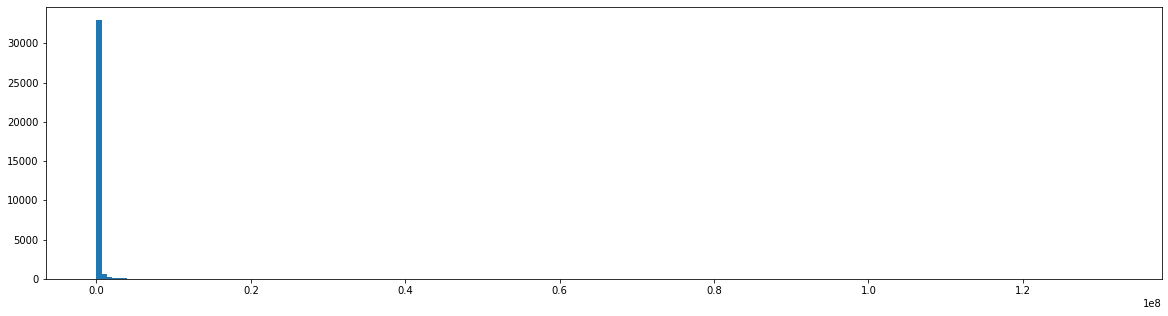

In [33]:
plt.figure(figsize = (20, 5))
plt.hist(permits['cost'], bins = 200);

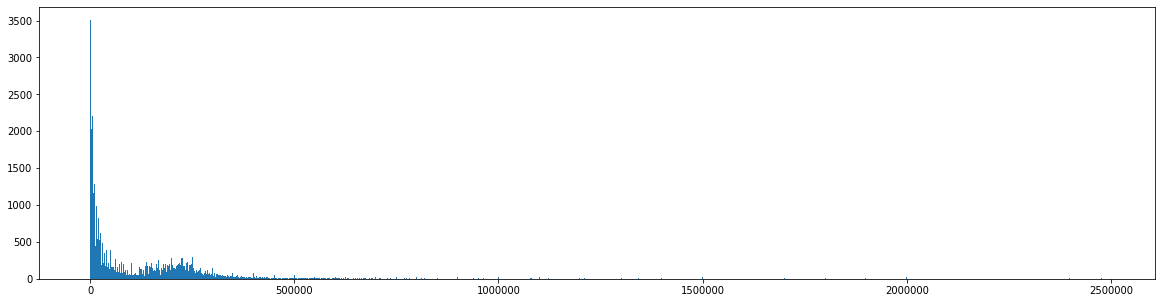

In [55]:
# This one is just for fun. Looks like most are very low cost, with a secondary mode around 200000-250000
plt.figure(figsize = (20, 5))
plt.hist(permits[permits['cost'] < 2500000]['cost'], bins = 1000);

In [94]:
# What is the longest time a permit took to be issued?

permits['enter_date'] = pd.to_datetime(permits['enter_date'])
permits['issue_date'] = pd.to_datetime(permits['issue_date'])
permits['lapse'] = permits['issue_date']-permits['enter_date']
permits['lapse'].value_counts()

0 days       10804
1 days        2246
7 days        1123
6 days        1089
2 days        1080
             ...  
1212 days        1
701 days         1
421 days         1
540 days         1
1391 days        1
Name: lapse, Length: 491, dtype: int64

2017    11624
2019    11171
2018    11089
2016      590
Name: issue_year, dtype: int64
max 2017:  2017-12-29 00:00:00
min 2017:  2017-01-03 00:00:00
max 2018:  2018-12-31 00:00:00
min 2018:  2018-01-02 00:00:00
max 2019:  2019-12-12 00:00:00
min 2019:  2019-01-02 00:00:00
Subsetting...
max 2017:  2017-12-12 00:00:00
min 2017:  2017-01-03 00:00:00
max 2018:  2018-12-12 00:00:00
min 2018:  2018-01-02 00:00:00
max 2019:  2019-12-12 00:00:00
min 2019:  2019-01-02 00:00:00


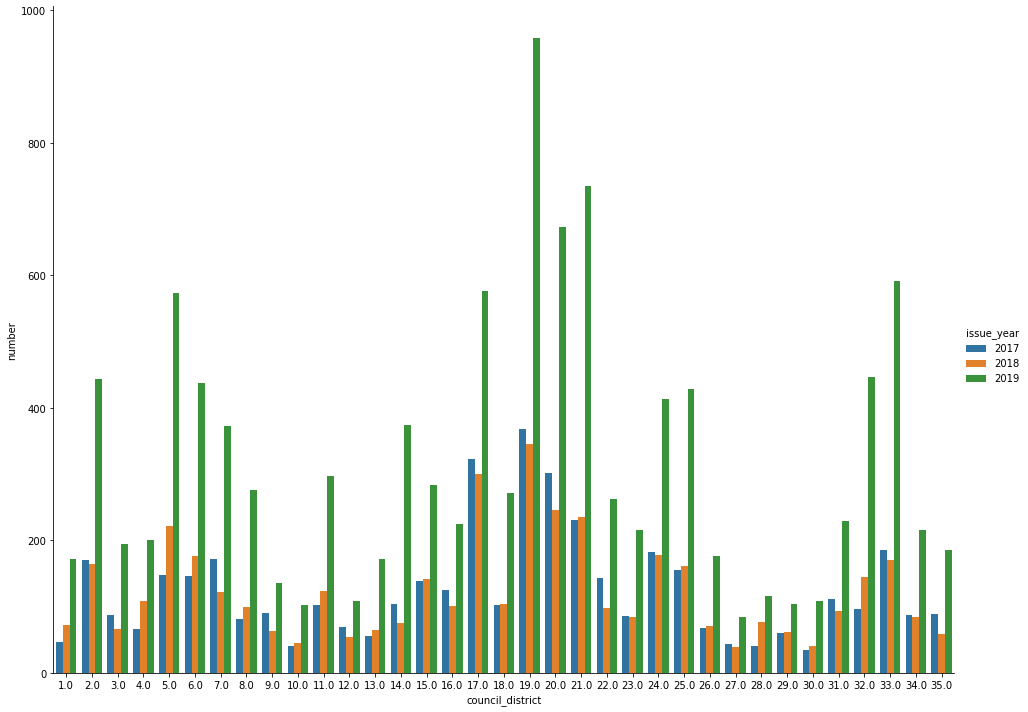

In [131]:
# What years are covered in this data set? 

permits['issue_year'] = permits['issue_date'].dt.year
print(permits['issue_year'].value_counts())

# Drop years that have fewer than 5000 rows. For any years that were dropped, how many rows were in that year

# 2016 only has 590 rows

# Make subsets for the remaining years

permits_2017 = permits[permits['issue_year']==2017]
permits_2018 = permits[permits['issue_year']==2018]
permits_2019 = permits[permits['issue_year']==2019]

# If any years are missing more than 5 days from the beginning or end of the year,
# truncate the other years so that each year covers the same date range.
# For example, if you have the years 2017, 2018, and 2019,
# but 2019 only has rows through December 12 (the other go through the end of Dec),
# remove rows for December 13-31 from 2017 and 2018

print('max 2017: ', max(permits_2017['issue_date']))
print('min 2017: ', min(permits_2017['issue_date']))
print('max 2018: ', max(permits_2018['issue_date']))
print('min 2018: ', min(permits_2018['issue_date']))
print('max 2019: ', max(permits_2019['issue_date']))
print('min 2019: ', min(permits_2019['issue_date']))

print('Subsetting...')
permits_2017 = permits_2017[(permits_2017['issue_date'].dt.month <= 12) &
                            (permits_2017['issue_date'].dt.day <= 12)]
permits_2018 = permits_2018[(permits_2018['issue_date'].dt.month <= 12) &
                            (permits_2018['issue_date'].dt.day <= 12)]

print('max 2017: ', max(permits_2017['issue_date']))
print('min 2017: ', min(permits_2017['issue_date']))
print('max 2018: ', max(permits_2018['issue_date']))
print('min 2018: ', min(permits_2018['issue_date']))
print('max 2019: ', max(permits_2019['issue_date']))
print('min 2019: ', min(permits_2019['issue_date']))

# Recombine the remaining datasets into one df

permits_compare_year = pd.concat([permits_2017, permits_2018, permits_2019])

# Use groupby to count number of permits in each council district for each year.

permits_count_dist_year = permits_compare_year.groupby(['issue_year', 'council_district']).count().reset_index()[['issue_year', 'council_district', 'number']]

# Use seaborn to make a grouped bar plot to visualize the data

g = sns.catplot(x="council_district",
                y="number",
                hue="issue_year",
                data=permits_count_dist_year,
                kind="bar",
                height=10,
                aspect=1.35)


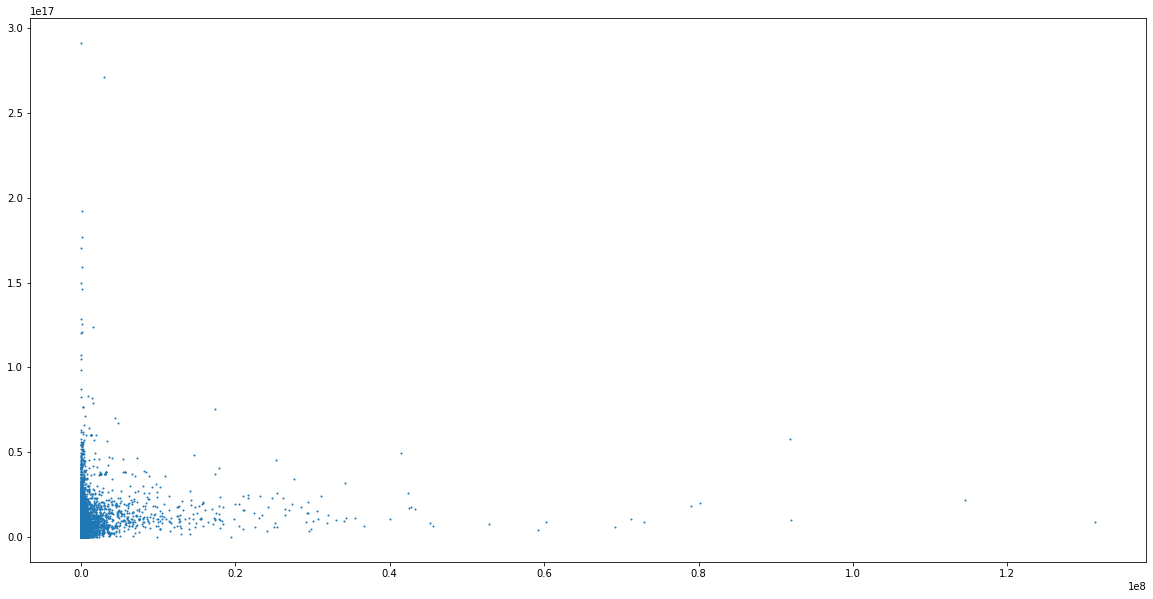

In [103]:
# Mostly just playing, scatter plot comparing permit cost and time lapse between enter and issue date
plt.figure(figsize = (20, 10))
plt.scatter(permits['cost'], permits['lapse'].astype(int), s = 1);

In [132]:
# Import short term rental permits dataset that was downloaded from data.nashville.gov into dataframe

short_term_permits = pd.read_csv('data/Residential_Short_Term_Rental_Permits.csv')

In [137]:
# Keep columns ['Permit #', 'Applicant', 'Contact', 'Permit Subtype Description',
#               'Permit Status', 'Parcel', 'Date Entered', 'Date Issued',
#               'Expiration Date', 'Address', 'City', 'State', 'ZIP', 'Purpose',
#               'Permit Owner Name', 'Permit Type', 'Council District']

short_term_permits = short_term_permits.iloc[:,[0, 1, 6, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 30, 32]]

# Rename columns to ['id', 'applicant', 'contact', 'subtype_desc',
#                    'status', 'parcel', 'entered', 'issued',
#                    'expiration', 'address', 'city', 'state', 'zip', 'purpose',
#                    'permit_owner_name', 'type', 'council_district']

rename_dict = dict(zip(short_term_permits.columns, ['id', 'applicant', 'contact', 'subtype_desc',
                                                    'status', 'parcel', 'entered', 'issued',
                                                    'expiration', 'address', 'city', 'state', 'zip', 'purpose',
                                                    'permit_owner_name', 'type', 'council_district']))

short_term_permits = short_term_permits.rename(columns = rename_dict)

In [138]:
short_term_permits.columns

Index(['id', 'applicant', 'contact', 'subtype_desc', 'status', 'parcel',
       'entered', 'issued', 'expiration', 'address', 'city', 'state', 'zip',
       'purpose', 'permit_owner_name', 'type', 'council_district'],
      dtype='object')

In [140]:
short_term_permits['issued'].dt.year.unique()

array([2018., 2017.,   nan, 2015., 2019., 2016., 2020.])

In [141]:
# Select comparable dates with permits
short_term_permits['issued'] = pd.to_datetime(short_term_permits['issued'])
short_term_permits = short_term_permits[short_term_permits['issued'].dt.date.isin(permits_compare_year['issue_date'].dt.date)]


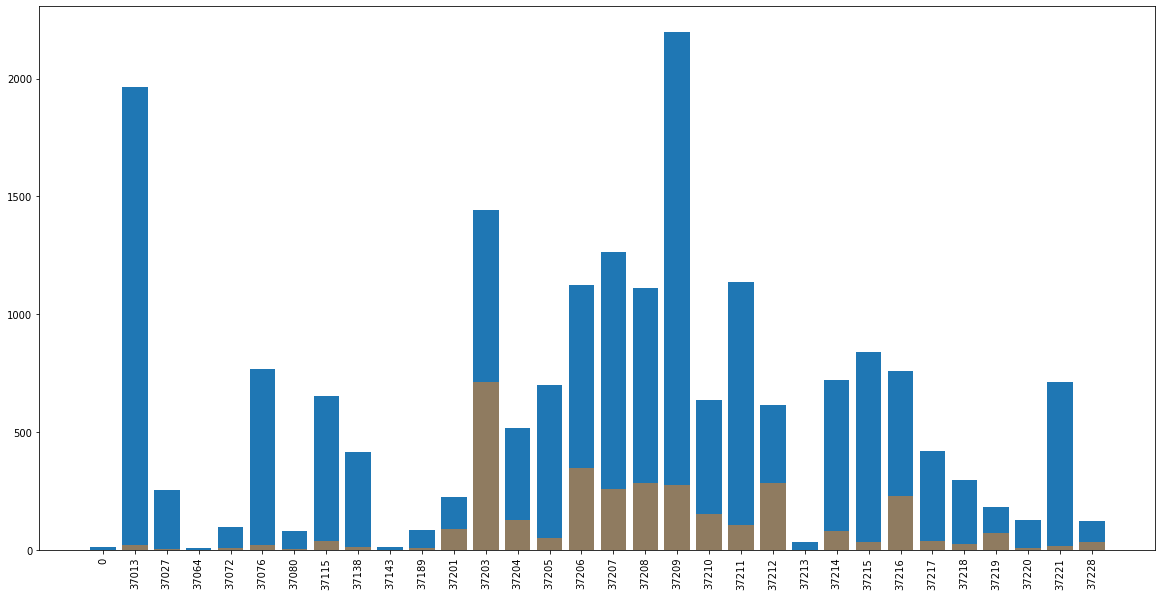

In [145]:
# Compare number of building permits and short term rental permits for each zip code (for a specific comparable year)
# Are the number of building and short term rental permits correlated?
# Are there zip that seem to have a particularly different ratio of building to short term rental permits?
# Can you find any reasons in the data why any differences might have occured?

permits_zip_vc = permits_compare_year['zip'].value_counts().sort_index()
short_term_permits_zip_vc = short_term_permits['zip'].value_counts().sort_index()
permits_merge = pd.merge(permits_zip_vc, short_term_permits_zip_vc, how = 'inner', left_index = True, right_index = True, suffixes = ('_build', '_rent'))

# This isn't a good way to represent the data, probably something similar to the seaborn graph above
plt.figure(figsize = (20, 10))
plt.bar(permits_merge.index.astype('str'), permits_merge['zip_build'])
plt.bar(permits_merge.index.astype('str'), permits_merge['zip_rent'], alpha = 0.5)
plt.xticks(rotation = 90);

In [277]:
# How many building permits also had short term rental permits?
# Merge the two data sets on the 'parcel' column.
# Does one permit usually happen before the other?

parcel_join = pd.merge(permits, short_term_permits, on = 'parcel', how = 'inner')
print('number both building and short term: ', len(parcel_join))
parcel_join['issue_diff'] = parcel_join['issue_date'] - parcel_join['issued']
print('building before: ', sum(parcel_join['issue_diff'].astype(int) > 0))
print('building after: ', sum(parcel_join['issue_diff'].astype(int) < 0))
print('same: ', sum(parcel_join['issue_diff'].astype(int) == 0))



number both building and short term:  2270
building before:  450
building after:  1817
same:  3


short_term_permits.to_csv('short_erd_test.csv')

In [157]:
# Try out some sql stuff

db = 'data/stations.db'
con = sql.connect(db)
mycursor = con.cursor() 
mycursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
tables=(mycursor.fetchall())
print(tables)

[('fire_stations',)]


In [186]:
# Use pandas read_sql_query to read in the fire_stations database

fire_stations = pd.read_sql_query('select * from fire_stations', sql.connect('data/stations.db'))

In [187]:
# How many fire stations are in each district?
# Do any districts not have a fire station?
fire_stations.head()

,district,station_number,address,city,state,zipcode,lat,lng
0,1,Station 30,3705 Old Clarksville Pike,Joelton,TN,37080,36.316384,-86.876877
1,2,Station 24,3851 Clarksville Highway,Nashville,TN,37218,36.203627,-86.840622
2,2,Station 25,2589 Whites Creek Pike,Nashville,TN,37207,36.215851,-86.801616
3,8,Station 1,130 Broadmoor Avenue,Nashville,TN,37207,36.229579,-86.757426
4,8,Station 31,415 Douglas Avenue,Madison,TN,37115,36.259135,-86.716084


In [220]:
fire_stations['district'].value_counts()

17    3
15    2
2     2
7     2
24    2
8     2
21    2
19    2
13    2
3     1
5     1
6     1
9     1
11    1
14    1
33    1
16    1
32    1
18    1
20    1
22    1
23    1
25    1
26    1
27    1
29    1
30    1
1     1
Name: district, dtype: int64

In [215]:
fire_stations['district'] = fire_stations['district'].astype(int)

In [222]:
# don't have fire stations
list(set(permits['council_district'].unique().tolist()) - set(fire_stations['district'].unique().tolist()))

[nan, 34.0, 35.0, 4.0, 10.0, 12.0, 28.0, 31.0]

In [188]:
# zipcode is int, but lat and lng are not. also district
fire_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
district          38 non-null object
station_number    38 non-null object
address           38 non-null object
city              38 non-null object
state             38 non-null object
zipcode           38 non-null int64
lat               38 non-null float64
lng               38 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 2.5+ KB


In [191]:
nash_map = folium.Map(location=[36.1612, -86.7775], zoom_start=12)
nash_map

In [189]:
fire_stations['lat'] = fire_stations['lat'].astype(float)
fire_stations['lng'] = fire_stations['lng'].astype(float)

In [194]:
nash_map = folium.Map(location=[36.1612, -86.7775], zoom_start=12)
for ind, row in fire_stations.iterrows():
    point = [row['lat'], row['lng']]
    folium.Marker(point, popup=row['station_number'], icon=folium.Icon(color='red')).add_to(nash_map)
nash_map

In [216]:
stations_in_dist = fire_stations.groupby('district')['station_number'].unique().reset_index()

In [279]:
stations_in_dist

,district,station_number
0,1,[Station 30]
1,2,"[Station 24, Station 25]"
2,3,[Station 39]
3,5,[Station 3]
4,6,[Station 14]
5,7,"[Station 29, Station 18]"
6,8,"[Station 1, Station 31]"
7,9,[Station 38]
8,11,[Station 36]
9,13,"[Station 15, Station 4]"


In [274]:
# Merge fire stations with permits df

permits_fire = pd.merge(permits, stations_in_dist, how = 'left', left_on = 'council_district', right_on = 'district')


permits.to_csv('permits_erd_test.csv')
stations_in_dist.to_csv('stations_erd_test.csv')

In [275]:
permits_fire

,number,type_desc,subtype_desc,parcel,enter_date,issue_date,cost,address,city,state,...,subtype_code,tracking_number,purpose,council_district,census_tract,mapped_location,issue_year,lapse,district,station_number
0,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,2019-11-01,2019-11-01,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,...,CAZ01A001,3728422,to demolish existing residence and detached st...,8.0,37011002.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228...",2019,0 days 00:00:00.000000000,8.0,"[Station 1, Station 31]"
1,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,2019-02-25,2019-07-22,0.0,812 BRIAR CIR,MADISON,TN,...,CAA03R301,3611315,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,37010802.0,"812 BRIAR CIR\nMADISON, TN 37115",2019,147 days 00:00:00.000000000,8.0,"[Station 1, Station 31]"
2,2019011479,Building Commercial - Rehab,Restaurant (Full Service),11714005500,2019-02-27,2019-07-22,759670.0,2171 GREEN HILLS VILLAGE DR,NASHVILLE,TN,...,CAF19A203,3613106,2475 sq.ft. build out of CAVA RESTURANT to inc...,25.0,37017901.0,"2171 GREEN HILLS VILLAGE DR\nNASHVILLE, TN 372...",2019,145 days 00:00:00.000000000,25.0,[Station 20]
3,2019039568,Building Residential - New,Single Family Residence,085040A40800CO,2019-07-03,2019-07-22,300888.0,4327 STONE HALL BLVD,HERMITAGE,TN,...,CAA01R301,3687554,New Single Family construction - Total Sq foot...,14.0,37015402.0,"4327 STONE HALL BLVD\nHERMITAGE, TN 37076",2019,19 days 00:00:00.000000000,14.0,[Station 32]
4,2017000049,Building Residential - New,Single Family Residence,164100A43100CO,2017-01-03,2017-01-09,268107.0,704 ABERCORN CT,ANTIOCH,TN,...,CAA01R301,3306701,TO CONSTRUCT A NEW SINGLE FAMILY RES AT 2380 S...,32.0,37015630.0,"704 ABERCORN CT\nANTIOCH, TN 37013\n(36.045042...",2017,6 days 00:00:00.000000000,32.0,[Station 26]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34469,2018065491,Building Residential - Addition,Single Family Residence,08307030200,2018-10-16,2018-10-30,161540.0,2212 EASTLAND AVE,NASHVILLE,TN,...,CAA01R301,3569305,to construct 2 story addition which will add 1...,6.0,37012100.0,"2212 EASTLAND AVE\nNASHVILLE, TN 37206\n(36.18...",2018,14 days 00:00:00.000000000,6.0,[Station 14]
34470,2017019524,Building Residential - Addition,Single Family Residence,04313027400,2017-03-22,2017-03-22,20000.0,316 CHERRY ST,MADISON,TN,...,CAA01R301,3338760,EXISTING ONE STORY HOUSE.\nTHIS PERMIT:\n1...N...,9.0,37010701.0,"316 CHERRY ST\nMADISON, TN 37115\n(36.258694, ...",2017,0 days 00:00:00.000000000,9.0,[Station 38]
34471,2018008218,Building Commercial - Rehab,"General Office, Professional Services",03409008400,2018-02-13,2018-04-17,14000.0,131 EDENWOLD RD,MADISON,TN,...,CAD02B016,3446279,BUILDING AT 2100 SQFT WITH UNFINISH ATTIC AT A...,10.0,37010401.0,"131 EDENWOLD RD\nMADISON, TN 37115\n(36.287001...",2018,63 days 00:00:00.000000000,NaN,NaN
34472,2017044878,Building Sign Permit,Sign - Ground / Wall Signs,09306208500,2017-07-10,2017-08-23,5000.0,110 2ND AVE N,NASHVILLE,TN,...,CAZ02A001,3384196,to erect 28SF illuminated wall sign for Famous...,19.0,37019500.0,"110 2ND AVE N\nNASHVILLE, TN 37201\n(36.162296...",2017,44 days 00:00:00.000000000,19.0,"[Station 9, Station 2]"


In [224]:
survey = pd.read_csv('data/Metro_Resident_Survey_Responses.csv')

In [227]:
for i in survey.columns:
    print(i)

Period
Start Date
End Date
ZIP Code
Service District
Quality of Life
Overall Feeling of Safety
Neighborhood Safety
City Appearance
Neighborhood Appearance
Nashville as Residence
Nashville as Place to Raise Children
Nashville as Workplace
Nashville as Place to Start/Grow Business
Nashville as Retirement Place
Metro Services - Overall
Value Received from Taxes
Elected Official Leadership
Elected Official Responsiveness
Elected Official Accessibility
Metro Transparency and Ethics
Metro Budgeting and Stewardship
Customer Service
Metro Communication
Decision Input Opportunity
Crime Prevention
Police - Overall
Fire and EMS - Overall
Streets and Sidewalks - Overall
Trash and Recycling - Overall
Public Education
Public Health - Overall
Public Library
Social Services - Overall
Economic Development - Overall
Parks and Recreation - Overall
Code Enforcement - Overall
Public Transit - Overall
Water Services - Overall
Metro-provided Arts and Culture - Overall
Affordable Housing - Overall
Historic Pr

In [225]:
survey.head()

,Period,Start Date,End Date,ZIP Code,Service District,Quality of Life,Overall Feeling of Safety,Neighborhood Safety,City Appearance,Neighborhood Appearance,...,Race / Ethnicity - Black,Race / Ethnicity - Hispanic,Race / Ethnicity - Asian or Pacific Islander,Race / Ethnicity - Native American or Alaskan Native,Race / Ethnicity - Other,Race / Ethnicity - Other Definition,Total Annual Household Income,Age,Gender Identity,Education Attained
0,2018Q2,06/21/2018,07/16/2018,37208,Urban Services District,Neutral,Neutral,Neutral,Neutral,Satisfied,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,25-34,Female,High school graduate
1,2018Q2,06/21/2018,07/16/2018,37211,Urban Services District,Satisfied,Satisfied,Satisfied,Neutral,Satisfied,...,NaN,NaN,NaN,NaN,NaN,NaN,"$100,000 or more",45-54,Female,Graduate degree
2,2018Q2,06/21/2018,07/16/2018,37208,Urban Services District,Very Satisfied,Neutral,Satisfied,Satisfied,Satisfied,...,NaN,NaN,NaN,NaN,NaN,NaN,"$30,000 to $59,999",25-34,Male,Bachelor's degree
3,2018Q2,06/21/2018,07/16/2018,37203,Urban Services District,Satisfied,Very Satisfied,Satisfied,Satisfied,Satisfied,...,NaN,NaN,NaN,NaN,NaN,NaN,"$30,000 to $59,999",25-34,Male,Bachelor's degree
4,2018Q1,02/01/2018,03/06/2018,37138,General Services District,Satisfied,Satisfied,Satisfied,NaN,Satisfied,...,NaN,NaN,NaN,NaN,NaN,NaN,"$60,000 to $99,999",45-54,Female,NaN


In [230]:
min(pd.to_datetime(survey['Start Date']))

Timestamp('2018-02-01 00:00:00')

In [240]:
permits['lapse'] = permits['lapse'].astype(str)

In [241]:
engine = create_engine('sqlite:///multi_table.db')

fire_stations.to_sql('fire_stations', engine, index=False, if_exists='replace')
survey.to_sql('resident_survey', engine, index=False, if_exists='replace')
permits.to_sql('building_permits', engine, index=False, if_exists='replace')
short_term_permits.to_sql('short_term_permits', engine, index=False, if_exists='replace')

In [ ]:
engine = db.create_engine('sqlite:///test.sqlite') #Create test.sqlite automatically
connection = engine.connect()
metadata = db.MetaData()

emp = db.Table('emp', metadata,
              db.Column('Id', db.Integer()),
              db.Column('name', db.String(255), nullable=False),
              db.Column('salary', db.Float(), default=100.0),
              db.Column('active', db.Boolean(), default=True)
              )

metadata.create_all(engine) #Creates the table


#Inserting record one by one
query = db.insert(emp).values(Id=1, name='naveen', salary=60000.00, active=True) 
ResultProxy = connection.execute(query)


#Inserting many records at ones
query = db.insert(emp) 
values_list = [{'Id':'2', 'name':'ram', 'salary':80000, 'active':False},
               {'Id':'3', 'name':'ramesh', 'salary':70000, 'active':True}]
ResultProxy = connection.execute(query,values_list)

In [244]:
db = 'data/multi_table.db'
con = sql.connect(db)
mycursor = con.cursor() 
mycursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
tables=(mycursor.fetchall())
print(tables)

[('building_permits',), ('fire_stations',), ('resident_survey',), ('short_term_permits',)]


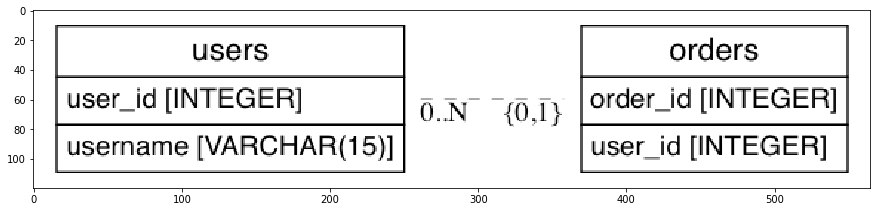

In [255]:
import matplotlib.image as mpimg
from sqlalchemy import (MetaData, Table, Column, Integer, String, ForeignKey)    
metadata = MetaData()

# create your own model ....
users = Table('users', metadata,
    Column('user_id', Integer(), primary_key=True),
    Column('username', String(15), nullable=False, unique=True),
)    
orders = Table('orders', metadata,
    Column('order_id', Integer()),
    Column('user_id', ForeignKey('users.user_id')),
)
# add your own table ....

# Show ER model from here
filename = 'mymodel.png'
render_er(metadata, filename)
imgplot = plt.imshow(mpimg.imread(filename))
plt.rcParams["figure.figsize"] = (3,2)
plt.show()

In [256]:
render_er('sqlite:///multi_table.db', 'test.png')

In [ ]:
# Entity Relationship Diagram